In [8]:
import pandas as pd

mydata = pd.read_csv('Vivax_Inventory.csv')
mydata.head()

,id_round,id,round,Eligible for genomics,pfct,pvct,sample_type,Total_infection_moments,total _recurence,date_bl,date_fl,age,age_category,gender,status,date_recurrence
0,Sero-040-01,Sero-040,1,e,0.0,21.7,WB,4,2.0,12/16/2020,12/16/2020,15.0,10-15 years,Female,Recruitment,NaN
1,Sero-040-04,Sero-040,4,e,0.0,21.3,WB,4,2.0,12/16/2020,6/18/2021,NaN,NaN,NaN,Recurrence,19/03/2021
2,Sero-040-08,Sero-040,8,e,20.1,23.7,WB,4,2.0,12/21/2020,12/21/2020,NaN,NaN,NaN,Recurrence,15/07/2021
3,Sero-040-12,Sero-040,12,e,0.0,27.4,WB,4,NaN,12/21/2020,1/21/2021,NaN,NaN,NaN,Recurrence,19/10/2021
4,Sero-040-14,Sero-040,14,e,0.0,31.5,WB,4,NaN,12/21/2020,2/21/2021,NaN,NaN,NaN,Follow-up,NaN


In [9]:
mydata.sort_values(by='round', inplace=True)

In [12]:

round_lists = { "R1_to_R3": [],
    "R3_to_R4": [],
    "R4_to_R5": [],
    "R5_to_R6": [],
    "R6_to_R7": [],
    "R7_to_R8": [],
    "R8_to_R9": [],
    "R9_to_R10": [],
    "R10_to_R11": [],
    "R11_to_R12": [],
    "R12_to_R13": [],
    "R13_to_R14": [],
    "R14_to_R15": []  }
rounds = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
r_lists = []
id_list = []
count = 0 
for i, round, keys in zip(range(len(rounds)), rounds, round_lists.keys()):
    
    for prev_round in mydata.loc[mydata['round'] == rounds[i], 'id'].tolist():
        count +=1
        id_list.append(prev_round)

        if prev_round in  mydata.loc[mydata['round'] == rounds[i+1], 'id'].tolist():
            round_lists[keys].append(keys)
            r_lists.append('Pass')
        else:
            r_lists.append('Not Pass')
            round_lists[keys].append('Not Pass')

    # for j, round3 in mydata[mydata['round'] == 3].iterrows():
    #     if round1['id'] in 
print(i)
print(count)

12
373


In [6]:
len(r_lists)

373

In [14]:
pass_count = {}
for key in round_lists.keys():
    pass_count[key] = round_lists[key].count(key)

pass_count.values()
pass_count = list(pass_count.values())
pass_count

[10, 4, 10, 8, 3, 5, 2, 3, 3, 4, 1, 1, 0]

In [15]:
pass_count= [0] + pass_count + [0]
pass_count

[0, 10, 4, 10, 8, 3, 5, 2, 3, 3, 4, 1, 1, 0, 0]

In [13]:
holdd = []
r_holder = []
count = 0
for r in mydata['round']:
    if r in r_holder:
        r_holder.append(r)
        holdd.append('None')
    else:
        r_holder.append(r)
        holdd.append(pass_count[count])
        count +=1 
holdd

count

NameError: name 'pass_count' is not defined

In [17]:
new_data = mydata
# new_data['count'] = holdd 
new_data['r_lists2'] = r_lists

ValueError: Length of values (373) does not match length of index (376)

In [128]:
new_data.to_csv('D:\Educational\Thesis Work\indie_new_data.csv')

In [ ]:
mydata['round'].unique()

In [ ]:
count_of_round = mydata['round'].value_counts()
count_of_round = list(count_of_round.values)
count_of_round

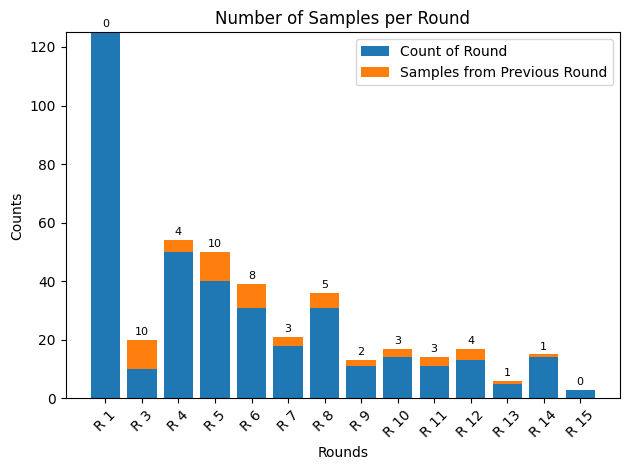

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Updated sample data to ensure consistency
rounds = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

categories = [f'R {i}' for i in rounds]  # Create a list of categories
count_of_round = [125, 10, 50, 40, 31, 18, 31, 11, 14, 11, 13, 5, 14, 3]
pass_count = [0, 10, 4, 10, 8, 3, 5, 2, 3, 3, 4, 1, 1, 0]  # Ensure same length as count_of_round

# Set the width and positions of the bars
x = np.arange(len(categories))

# Create the bar plot
plt.bar(x, count_of_round, label='Count of Round')
plt.bar(x, pass_count, bottom=count_of_round, label='Samples from Previous Round')  # Stacked on top of count_of_round

# Add values on top of the pass_count bars
for i in range(len(x)):
    plt.text(x[i], count_of_round[i] + pass_count[i] + 1,  # Position the text above the pass_count segment
             str(pass_count[i]), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Rounds')
plt.ylabel('Counts')
plt.title('Number of Samples per Round')
plt.xticks(ticks=x, labels=categories, rotation=45)  # Set x-axis labels and rotate for readability
plt.legend()  # Show legend

# Show the plot
plt.tight_layout()  # Adjust layout

plt.savefig('stacked_bar_plot.png', format='png', dpi=300)  # Save with 300 dpi for high quality
plt.show()


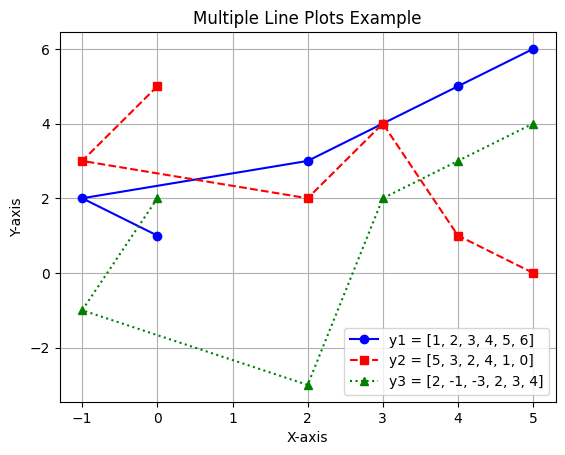

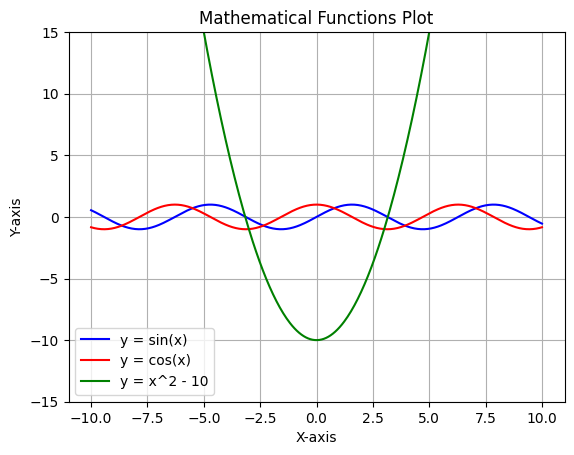

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-10, 10, 400)

# Define the mathematical functions
y1 = np.sin(x)          # Sine function
y2 = np.cos(x)          # Cosine function
y3 = x**2 - 10          # Quadratic function (may have negative values)

# Create the plot
plt.plot(x, y1, label='y = sin(x)', color='b')
plt.plot(x, y2, label='y = cos(x)', color='r')
plt.plot(x, y3, label='y = x^2 - 10', color='g')

# Add title and labels
plt.title('Mathematical Functions Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Add a grid for better readability
plt.grid()

# Set the limits for y-axis to better see negative values
plt.ylim(-15, 15)

# Show the plot
plt.show()

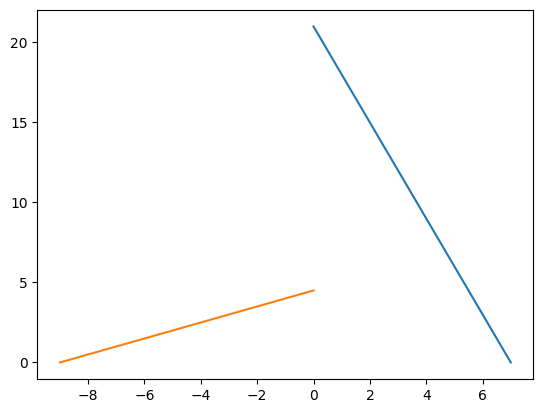

In [19]:
import matplotlib.pyplot as plt

plt.plot([7,0], [0, 21])
plt.plot([-9,0], [0, 4.5])

In [ ]:
import json



In [ ]:
hell in hand basket 6555666

In [ ]:
import RedCap
from importlib import reload


# This will reload the RedCap module when if there is change 
reload(RedCap)

In [ ]:
import json
my_tokens = None

# Open the Json file for reading which contain API tokens 
with open('api_keys.json', mode = 'r') as file:
    # Load the JSON data from file
    my_tokens = json.load(file)
len(my_tokens.items())

> ### <font color=#42f5c2>Summary count</font>


In [ ]:
def sub_dict_from_key_value(d, start_key, start_value):
    # Initialize the new dictionary
    new_dict = {}
    
    # Start adding items after the specified key-value position
    start_adding = False
    
    for key, values in d.items():
        # Check if we've reached the start key
        if key == start_key:
            # Try to find the index of the specified start value in the list of values
            try:
                start_index = values.index(start_value)
                # Add the sublist from start_value to the end of the list
                new_dict[key] = values[start_index:]
                # Set flag to add the rest of the keys
                start_adding = True
            except ValueError:
                raise ValueError(f"Value '{start_value}' not found in the list for key '{start_key}'.")
        elif start_adding:
            # For all keys after start_key, add their entire list of values
            new_dict[key] = values

    return new_dict

# Example usage
my_dict = {'a': [5, 6, 7], 'b': [7, 4, 6], 'c': [9, 8, 10]}
result = sub_dict_from_key_value(my_dict, 'b', 4)
print(result)  # Output: {'b': [4, 6], 'c': [9, 8, 10]}


In [ ]:
# Summary count of
print(f'Project_Catagory {" "*18} Count \n{"_"*40}')
for key in my_tokens.keys():
    print(f'{key} : {" "*(35-len(key))} {len(my_tokens[key])}')


> ### <font color=#42f5c2>Call projectName function to get RECap projects name using token</font>


In [ ]:
# Import user defined module called 'REDCap'
'''
There is a function called "project_name()" 
It will take the API keys and loads the project name assigned to it
'''
from REDCap import project_name
projects  = project_name(my_tokens)
print(projects.keys())

> ### <font color=#42f5c2>The  code below  takes user input of export format</font>
> <ul>
    <li>1 - CSV Data Raw</li>
    <li>2 - CSV Data Label</li>
    <li>3 - CSV Data Dictionary</li>
    <li>4 - XML Metadata Only</li>
    <li>5 - XML Metadata and Data</li>
    <li>6 - All</li>
</ul>


In [ ]:
import Exceptions
input_message = ''' Choose the Format of Data:
                                           1 - CSV Data Raw
                                           2 - CSV Data Label
                                           3 - CSV Data Dictionary
                                           4 - XML Metadata Only
                                           5 - XML Metadata and Data
                                           6 - All'''
format_list = {1:'csv raw', 2:'csv label', 3:'csv data dictionary', 4:'xml meta data', 5:'xml metadata and data', 6:'all'}





export_format = None

while True:
    try:
        export_format = input(input_message)
        if not export_format.isdigit():
            input_message = ''
        export_format = int(export_format)
        if export_format < 1 or export_format > 6:
            input_message = ''
            raise Exceptions.InputError()
    except ValueError:
        print('Error: Enter a valid selection')
    except Exceptions.InputError as e:
        print(f'Error: {e}')
    else: 
        break

print(f'{format_list[export_format]} Selected')
export_format = format_list[export_format]
export_format
        

> ### <font color=#42f5c2>Creating Necessary Directories in Local Computer</font>


In [ ]:
import os
import requests
import csv
import re
from datetime import date


url = 'https://redcapsvr2.ahri.gov.et/api/'

current_date = date.today().strftime('%B-%d-%Y')
root = 'E:\\MNTD\Backup\\'+current_date
sub_root_1 = ''
sub_root_2 = ''
sub_root_3 = ''
file_paths = dict()

if not os.path.exists(root):
    os.makedirs(root)
os.chdir(root)

for folder in projects.keys():
    sub_root_1 = folder
    if not os.path.exists(sub_root_1):
        os.makedirs(sub_root_1)
    for project, token in zip(projects[folder], my_tokens[folder]): 
        if re.findall(r'[\/:?"<>|]', project):
              project = re.sub(r'[\\/:?"<>|]','_',project)
        # print(project)
        sub_root_2 = sub_root_1 + '\\' + project.strip()
               
        if not os.path.exists(sub_root_2):   #create directory in local computer if it doesn't exist
            os.makedirs(sub_root_2)
        file_paths[token] = sub_root_2    


print('done')

In [ ]:
switch_format = {
            'csv data raw' : csv_data_raw,
            'csv data label' : csv_data_label,
            'csv data dictionary': csv_data_dictionary,
            'xml metadata only': xml_metadata_only,
            'xml metadata and data' : xml_metadata_and_data,
            'all': all_exporter
}

selected_format = switch_format.get(export_format)
count = selected_format(file_paths)
print(f'Summary: {count} Total files saved successfully')

In [ ]:
def csv_data_raw(file_paths):
    count = 0
    with requests.Session() as session:
        for token, file_path in file_paths.items():
            #The base name of a path is the last component of the path
            file_name = os.path.basename(file_path)
            file_path = os.path.join(file_path, 'CSV Data Raw')
            if not os.path.exists(file_path):
                os.makedirs(file_path)

            file_path = os.path.join(file_path, file_name)[:215] + '.csv'

            data = {
                'token': token,
                'content': 'record',
                'action': 'export',
                'format': 'csv',
                'type': 'flat',
                'csvDelimiter': '',
                'rawOrLabel': 'raw',
                'rawOrLabelHeaders': 'raw',
                'exportCheckboxLabel': 'false',
                'exportSurveyFields': 'false',
                'exportDataAccessGroups': 'false', 
                'returnFormat': 'json'
            }
            csv_data = session.post(url,data=data)

            if csv_data.status_code == 200:   
                with open(file_path, mode='wb') as file:
                    file.write(csv_data.content)
                    count += 1
            else:
                print(f'CSV Data Raw : {count} files Saved! \n But Something Wrong with Loading {file_name}')
                
    print(f'CSV Data Raw: {count} files saved successfully')
    return count

In [ ]:
def csv_data_label(file_paths):
    count = 0
    with requests.Session() as session:
        for token, file_path in file_paths.items():
            #The base name of a path is the last component of the path
            file_name = os.path.basename(file_path)
            file_path = os.path.join(file_path, 'CSV Data Label')
            if not os.path.exists(file_path):
                os.makedirs(file_path)

            file_path = os.path.join(file_path, file_name)[:215] + '.csv'

            data = {
                'token': token,
                'content': 'record',
                'action': 'export',
                'format': 'csv',
                'type': 'flat',
                'csvDelimiter': '',
                'rawOrLabel': 'label',
                'rawOrLabelHeaders': 'raw',
                'exportCheckboxLabel': 'false',
                'exportSurveyFields': 'false',
                'exportDataAccessGroups': 'false', 
                'returnFormat': 'json'
            }
            csv_data = session.post(url,data=data)

            if csv_data.status_code == 200:   
                with open(file_path, mode='wb') as file:
                    file.write(csv_data.content)
                    count += 1
            else:
                print(f'CSV Data Label: {count} files Saved! \n But Something Wrong with Loading {file_name}')
                
    print(f'CSV Data Label: {count} files saved successfully')
    return count

In [ ]:
def csv_data_dictionary(file_paths):
    count = 0
    with requests.Session() as session:
        for token, file_path in file_paths.items():
            #The base name of a path is the last component of the path
            file_name = os.path.basename(file_path)
            file_path = os.path.join(file_path, 'CSV Data Dictionary')
            if not os.path.exists(file_path):
                os.makedirs(file_path)

            file_path = os.path.join(file_path, file_name)[:215] + '.csv'

            data = {
                'token': token,
                'content': 'metadata',
                'format': 'csv',
                'returnFormat': 'csv'
            }
            csv_data = session.post(url,data=data)

            if csv_data.status_code == 200:   
                with open(file_path, mode='wb') as file:
                    file.write(csv_data.content)
                    count += 1
            else:
                print(f'CSV Data Dictionary: {count} files Saved! \n But Something Wrong with Loading {file_name}')
                
    print(f'CSV Data Dictionary: {count} files saved successfully')
    return count

In [ ]:
def xml_metadata_only(file_path):
    count = 0
    with requests.Session() as session:
        for token, file_path in file_paths.items():
            #The base name of a path is the last component of the path
            file_name = os.path.basename(file_path)
            file_path = os.path.join(file_path, 'XML Metadata Only')
            if not os.path.exists(file_path):
                os.makedirs(file_path)

            file_path = os.path.join(file_path, file_name)[:215] + '.xml'

            data_config = {'token' : token,
                          'content' : 'project_xml',
                          'format' : 'xml',
                          'returnMetadataOnly' : 'true',
                          'exportFiles' : 'false',
                          'exportSurveyFields' : 'false',
                          'exportDataAccessGroups' : 'false',
                          'returnFormat' : 'json'
                            }
            xml_data = session.post(url, data = data_config)

            # write xml to local storage
            if xml_data.status_code == 200:
                with open(file_path, mode = 'wb') as file:
                    file.write(xml_data.content)
                    count += 1
            else:
                print(f'XML Metadata Only: {count} files Saved! \n But Something Wrong with Loading {file_name}')
                
    print(f'XML Metadata Only: {count} files saved successfully')
    return count
     

In [ ]:
def xml_metadata_and_data(file_path):
    count = 0
    with requests.Session() as session:
        for token, file_path in file_paths.items():
            #The base name of a path is the last component of the path
            file_name = os.path.basename(file_path)
            file_path = os.path.join(file_path, 'XML Metadata and Data')
            if not os.path.exists(file_path):
                os.makedirs(file_path)

            file_path = os.path.join(file_path, file_name)[:215] + '.xml'

            data_config = {'token' : token,
              'content' : 'project_xml',
              'format' : 'xml',
              'returnMetadataOnly' : 'false',
              'exportFiles' : 'false',
              'exportSurveyFields' : 'false',
              'exportDataAccessGroups' : 'false',
              'returnFormat' : 'json'
                }
            xml_data = session.post(url, data = data_config)

            # write xml to local storage
            if xml_data.status_code == 200:
                with open(file_path, mode = 'wb') as file:
                    file.write(xml_data.content)
                    count += 1
            else:
                print(f'XML Metadata and Data: {count} files Saved! \n But Something Wrong with Loading {file_name}')
                
    print(f'XML Metadata and Data: {count} files saved successfully')
    return count
     

In [ ]:
def all_exporter(file_path):
    count  = csv_data_raw(file_path) + csv_data_label(file_path) + csv_data_dictionary(file_path) + xml_metadata_only(file_path) + xml_metadata_and_data(file_path)
    return count